In [2]:
# checking the python version >= 3.5
import sys
assert sys.version_info >= (3, 5)
print(sys.version_info)

sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)


In [3]:
# checking for sklearn version >= 0.20
import sklearn
assert sklearn.__version__ >= "0.20"
print(sklearn.__version__)

0.23.1


In [4]:
# merge the data for oecd_bli and imf_gdp
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli.loc[oecd_bli['INEQUALITY'] == 'TOT']
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, 
    left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]

In [6]:
# # download the data files
# import urllib
# DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
# datapath = os.path.join("Data", "")
# os.makedirs(datapath, exist_ok=True)
# filenames = ['oecd_bil_2015.csv', 'gdp_per_capita.csv']

# for filename in filenames:
#     print("Downloading:", filename)
#     url = DOWNLOAD_ROOT + "Data" + filename
#     urllib.request.urlretrieve(url, datapath + filename)


In [33]:
# code from the book
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# setting the datapath
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
datapath = os.path.join(par_dir, "Data", "ch1", "")

In [34]:
# load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter="\t", encoding="latin1", na_values="n/a")

In [36]:
# preparing the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [37]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

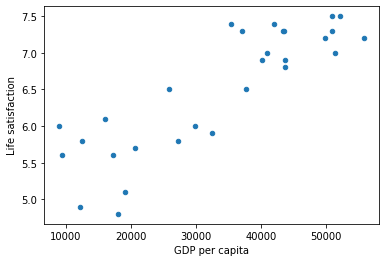

In [38]:
# visualize the data
country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [39]:
# select a linear model
model = sklearn.linear_model.LinearRegression()

# train the model
model.fit(X, y)

LinearRegression()

In [40]:
# make predictions for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # output [[5.96242338]]

[[5.96242338]]


In [48]:
# using k-nearest neighbors instead
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)

In [49]:
# train the model
model.fit(X, y)

# make predictions for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # output [[5.76666667]]

[[5.76666667]]
